# 5.Customizing Matplotlib With Style Sheets and rcParams
There are a few ways we can customize the properties and style of Matplotlib

https://matplotlib.org/tutorials/introductory/customizing.html#sphx-glr-tutorials-introductory-customizing-py

## Section

1)[Using Style Sheets](#Style-Sheets)
<br>
2)[Creating Your Own Style](#Creating-Your-Own-Style)
<br>
3)[Multiple Style Sheets](#Multiple-Style-Sheets)
<br>
4)[Local/Temporary Styling](#Local/Temporary-Styling)
<br>
5)[Matplotlib rcParams](#Matplotlib-rcParams)
<br>
6)[rc As a Function](#rc-As-a-Function)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

data = np.random.randn(50)

## Style Sheets
We used this before in the previous tutorial,#4. 

[Top](#Section)

In [31]:
#To see a list of available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [32]:
#Use the style function to set the style
plt.style.use('ggplot')

## Creating Your Own Style
You can create your own style and save if for future use. To do this you again call the style.use() function to load your saved style with the .mplstyle extension. If you had a file with the following parameter for the style you want to use, you can load it passing the path/url of the file.

import matplotlib.pyplot as plt
plt.style.use('./images/myStyle.mplstyle')

You can also use it by placing your .mplstyle file into the mp1_configdir/matplotlib dir and load it with style.use(myStyle). mp1_configdir should automatically look in the ~/.config/maplotlib. To check, run maplotlib.get_configdir(), you may need to create it if it is not already there. Goes without saying but do not name your style with the same name as the one prodived by Matplotlib. To use the style

plt.style.use(myStyle)

[Top](#Section)

## Multiple Style Sheets
The best feature of style sheets is that you can combine them together. You can have one stlye sheets for color, another to style the text, and one for line color. You can comebine them anyway you want by passing a list to style.use()

style.use(['myStyle','ggplot'])

<b>Important to remember that the style on the right will that precedence to that on the left 


## Local/Temporary Styling

[Top](#Section)

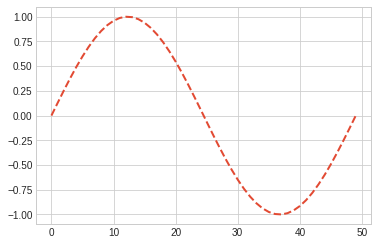

In [33]:
plt.style.use('seaborn-whitegrid') # here we are setting a global styling, white gride
plt.plot(np.sin(np.linspace(0, 2 * np.pi))) #linspace evenly spaces out the sample from 0 to 2, default is 50 spaces. 
                                            #since we multiply by pi, it will be from 0 to ~6.28. Then we take the sin of the 50 iterataion 
plt.show()



#### Now if we were to plot another graph it will take the global style, notice the white grid

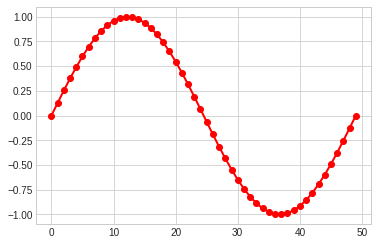

In [34]:
plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')   

#### To change the background for just one occurance we can use the style context and set the background for just this block of code

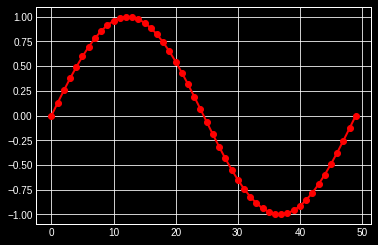

In [35]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')

## Matplotlib rcParams
Dynamic rc setting

[Top](#Section)

You can change the rc setting. RC stands for run command. It automatically Runs at start up and they Configure the parameters.

https://stackoverflow.com/questions/37728087/rc-params-in-matplotlib-what-does-rc-stand-for

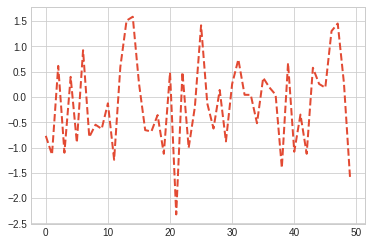

In [36]:
plt.plot(data)

Lets change the line width and the line style of this plot using the rcParams

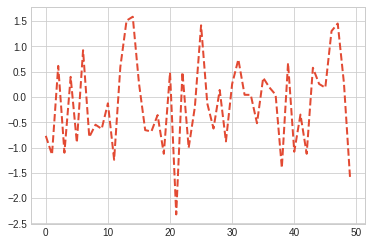

In [37]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(data)

Next we are going to change the typical plot colors by changing the prop_cycle property of axes

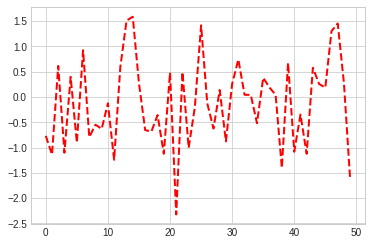

In [38]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data)  # first color is red

We can see that the first line is red, followed by green, blue then yellow.

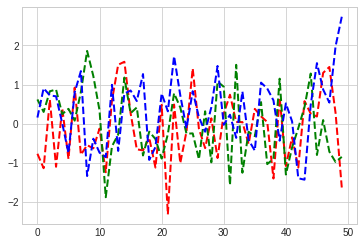

In [60]:
plt.plot(range(0,50), data, range(0,50), np.random.randn(50),range(0,50), np.random.randn(50))
#plt.plot([x],[y],[x2],[y2])

## rc As a Function

[Top](#Section)

We can also change the rc setting by using the matplotlib.rc. This can be used to change multiple setting at once.

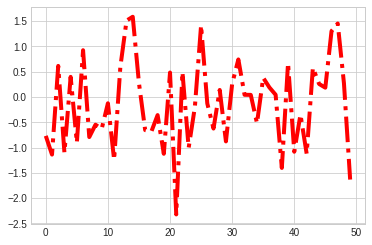

In [77]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

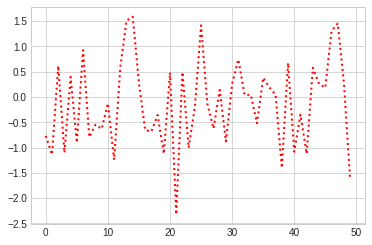

In [78]:
mpl.rc('lines', linewidth=2, linestyle=':')
plt.plot(data)
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc

## The matplotlibrc File
Handling default parameters in the matplotlibrc configuration file. Often to referred to as the rc setting or rc parameters, there a slue of things we can configure here. Below are just a few examples:
<ul>
<li>figure size and DPI</li>
<li>line width</li>
<li>color and style</li>
<li>axes</li>
<li>axis and grid properties</li>
<li>text and font properties</li>
</ul>

[Top](#Section)

The file itself is usually found in one of the following places:
<ol>
<li>matplotlibrc in the current working directory for special customization not used anywhere else</li>
<li>\$MATPLOTLIBRC if it is a file, else \$MATPLOTLIBRC/matplotlibrc.</li>
<li>It then looks in user specific place, depending upon which os you use</li>
<ol>
<li>On Linux and FreeBSD, it looks in .config/matplotlib/matplotlibrc (or $XDG_CONFIG_HOME/matplotlib/matplotlibrc) if you've customized your environment.
<li>On other platforms, it looks in .matplotlib/matplotlibrc.
</ol>
<li>INSTALL/matplotlib/mpl-data/matplotlibrc, where INSTALL is something like /usr/lib/python3.7/site-packages on Linux, and maybe C:\Python37\Lib\site-packages on Windows. Every time you install matplotlib, this file will be overwritten, so if you want your customizations to be saved, please move this file to your user-specific matplotlib directory.</li>
</ol>

It is important to note that once a matplotlibrc is found it will not search for other paths

***Official*** configuration and cache directory loaction
https://matplotlib.org/faq/troubleshooting_faq.html#locating-matplotlib-config-dir

In [82]:
#To see where the active matplotlibrc was loaded from
>>> import matplotlib
>>> matplotlib.matplotlib_fname()
'/home/foo/.config/matplotlib/matplotlibrc'

'/home/foo/.config/matplotlib/matplotlibrc'